In [4]:
from matplotlib.pyplot import imshow
import numpy as np

In [1]:
from PIL import Image

JPEG (1000, 657) RGB


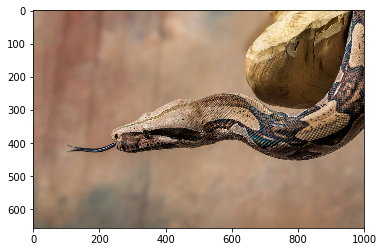

In [6]:
im = Image.open("python.jpg")
print(im.format, im.size, im.mode)
%matplotlib inline
imshow(np.asarray(im))

In [8]:
im.save("python.png")


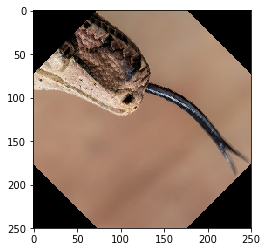

In [13]:
box = (100, 250, 350, 500)
region = im.crop(box)
region = region.transpose(Image.ROTATE_90)
region = region.rotate(45)
imshow(np.asarray(region))


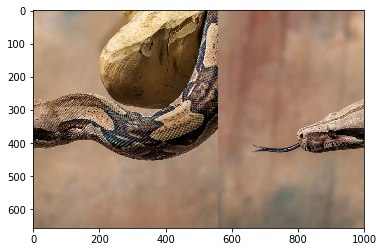

In [14]:
def roll(image, delta):
    xsize, ysize = image.size
    
    delta = delta % xsize
    if delta == 0: return image
    
    part1 = image.crop((0,0,delta, ysize))
    part2 = image.crop((delta,0,xsize, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))
    image.paste(part2, (0,0, xsize-delta, ysize))
    
    return image

new_im = roll(im, 440)
imshow(np.asarray(new_im))


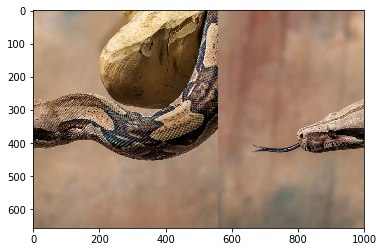

In [17]:
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))
imshow(np.asarray(im))

32

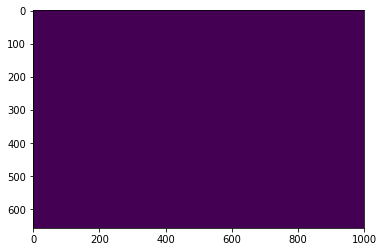

In [22]:
from PIL import ImageChops
im = Image.open("python.jpg")
                out = ImageChops.constant(im, 32)
imshow(np.asarray(out))
np.asarray(out)[1,1]

In [25]:
out = ImageChops.lighter(ImageChops.constant(im, 32), ImageChops.constant(im, 255))
np.asarray(out)[1,1]

255

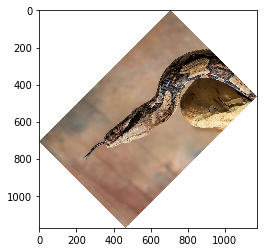

In [30]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)

im2 = out.convert('RGBA')
rot = im2.rotate(45, expand=1)
fff = Image.new('RGBA', rot.size, (255,)*4)
out = Image.composite(rot, fff, rot)

imshow(np.asarray(out))


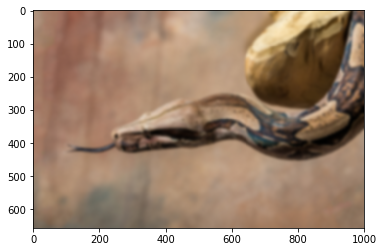

In [32]:

from PIL import ImageFilter
im = Image.open("python.jpg")
out = im.filter(ImageFilter.GaussianBlur(4))
imshow(np.asarray(out))


TypeError: Image data cannot be converted to float

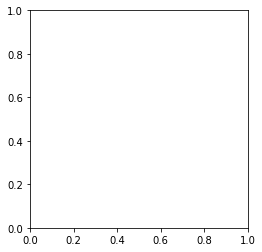

In [37]:
from PIL import ImageEnhance

enh = ImageEnhance.Sharpness(im)
enh.enhance(1)
imshow(np.asarray(enh))

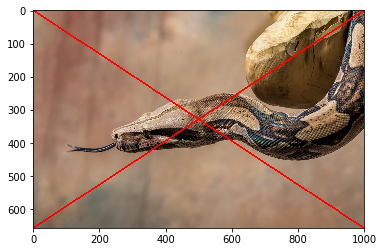

In [39]:
from PIL import ImageDraw

im = Image.open("python.jpg")

draw = ImageDraw.Draw(im)
draw.line((0,0) + im.size, fill="red", width=5)
draw.line((0, im.size[1], im.size[0], 0), fill="red", width=5)
imshow(np.asarray(im))


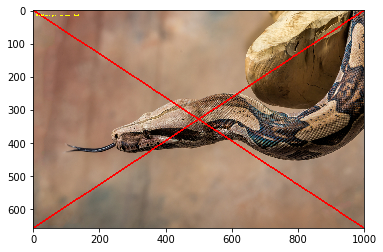

In [40]:
draw.text((10,10), "Paldies par uzmaniibu!", fill=(255,255,0))
imshow(np.asarray(im))


# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook